<a href="https://colab.research.google.com/github/shatadal88/Simple-Old-photo-restore-/blob/main/Old_Photo_restore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◢ Bringing Old Photos Back to Life

This is a reference implementation of paper Bringing Old Photos Back to Life, CVPR2020 (Oral) by Ziyu Wan1, Bo Zhang2, Dongdong Chen3, Pan Zhang4, Dong Chen2, Jing Liao1, Fang Wen2 City University of Hong Kong, Microsoft Research Asia, Microsoft Cloud AI, 4 USTC
 
Through this colab notebook we have tried to modified the original implementation so that this can be easily used by any person with limited technical knowledge. And this appears like a web page for restoring their personal photos. Click on the play button at the corner of each code block. There are two code blocks. The first one is to download pre trained models, hence it takes some time. This first block needs to be executed only once for a session. The second block has to be played for each image.
 
This notebook is created by shtadal ghosh

#◢ Block One run only once for single session Click on the below left cornner play botton to start


In [1]:
#Clone the repo
!git clone https://github.com/microsoft/Bringing-Old-Photos-Back-to-Life.git photo_restoration
# pull the syncBN repo
%cd photo_restoration/Face_Enhancement/models/networks
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../../

%cd Global/detection_models
!git clone https://github.com/vacancy/Synchronized-BatchNorm-PyTorch
!cp -rf Synchronized-BatchNorm-PyTorch/sync_batchnorm .
%cd ../../

# download the landmark detection model
%cd Face_Detection/
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2
%cd ../

# download the pretrained model
%cd Face_Enhancement/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Face_Enhancement/checkpoints.zip
!unzip checkpoints.zip
%cd ../

%cd Global/
!wget https://facevc.blob.core.windows.net/zhanbo/old_photo/pretrain/Global/checkpoints.zip
!unzip checkpoints.zip
%cd ../
! pip install -r requirements.txt
%cd /content/photo_restoration/
input_folder = "test_images/old"
output_folder = "output"

import os
basepath = os.getcwd()
input_path = os.path.join(basepath, input_folder)
output_path = os.path.join(basepath, output_folder)
if not os.path.exists(output_path):
        os.mkdir(output_path)




Cloning into 'photo_restoration'...
remote: Enumerating objects: 456, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 456 (delta 72), reused 102 (delta 53), pack-reused 314
Receiving objects: 100% (456/456), 32.25 MiB | 26.63 MiB/s, done.
Resolving deltas: 100% (188/188), done.
/content/photo_restoration/Face_Enhancement/models/networks
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 188 (delta 10), reused 27 (delta 10), pack-reused 161
Receiving objects: 100% (188/188), 47.20 KiB | 402.00 KiB/s, done.
Resolving deltas: 100% (106/106), done.
/content/photo_restoration
/content/photo_restoration/Global/detection_models
Cloning into 'Synchronized-BatchNorm-PyTorch'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing 

#◢ Block TWO run every time for selecting each image Click on the below left cornner play botton to start

/content/photo_restoration/test_images/old


Saving test1 (1).png to test1 (1).png
User uploaded file "test1 (1).png" with length 410315 bytes
/content/photo_restoration
test1 (1)
test1 (1).png
Running Stage 1: Overall restoration
initializing the dataloader
model weights loaded
directory of testing image: /content/photo_restoration/test_images/old
processing test1 (1).png
You are using NL + Res
Now you are processing test1 (1).png
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)
Finish Stage 1 ...


Running Stage 2: Face Detection
1
Finish Stage 2 ...


Running Stage 3: Face Enhancement
The main GPU is 
0
dataset [FaceTestDataset] of size 1 was created
The size of the latent vector size is [8,8]
Network [SPADEGenerator] was c

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Enhanced Image


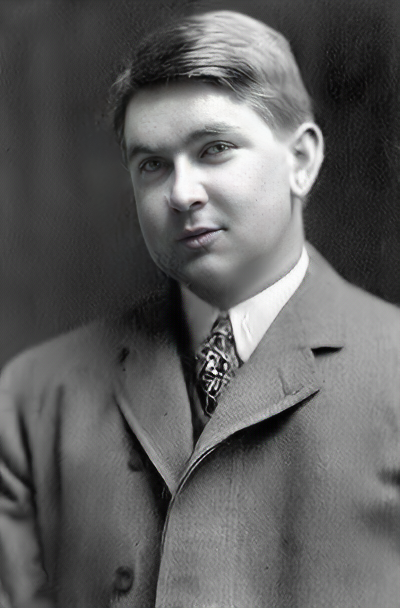

In [3]:
!rm -rf /content/photo_restoration/test_images/old/*
!rm -rf /content/photo_restoration/output/*

%cd /content/photo_restoration/test_images/old/
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  review_text=(uploaded[fn])
%cd /content/photo_restoration
image_name=str(fn)
parts = image_name.split(".")
print(parts[0])
print(image_name)
!python run.py --input_folder /content/photo_restoration/test_images/old/ --output_folder /content/photo_restoration/output/ --GPU 0 --with_scratch
out_path='/content/photo_restoration/output/final_output/'+parts[0]+'.png'
in_path='/content/photo_restoration/test_images/old/'+image_name
import numpy as np
import PIL
#imi=PIL.Image.open(in_path)
#print("Original Image")
#imi


#download the enhanced image

files.download(out_path)
imo=PIL.Image.open(out_path)
print("Enhanced Image")
imo